In [ ]:
!pip install ultralytics
!pip install torch
!pip install pillow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content'

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
path = r'/content/drive/MyDrive/BoltRecognize-v1/test'
filename = '20230717_160706_original.jpg'

In [ ]:
from ultralytics import YOLO
import os

# Load a model
model = YOLO("yolov8m.yaml")  # build a new model from scratch
model = YOLO("/content/drive/MyDrive/BoltRecognize-v1/t1a-v8m-640.pt")  # load a pretrained model (recommended for training)

results = model.predict(source=os.path.join(path, filename), conf=0.2, save=True)



                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics.nn.modules.conv.Conv             [384

In [ ]:
import pandas as pd
for result in results:
  boxes = result.boxes.data
#print(boxes)
t=0
df = pd.DataFrame(columns=['x1','y1','x2','y2','confidence','class'])
bbox=[]
for i in boxes:
    #print(i)
    test = i.tolist()
    df.loc[len(df)] = [test[0],test[1],test[2],test[3],test[4],test[5]]
df.shape
df.head()

import numpy as np
for ind in df.index:
    print(df['x1'][ind], df['y1'][ind],df['x2'][ind], df['y2'][ind])

df.shape

103.11018371582031 1237.26708984375 959.7965698242188 1898.0767822265625


(1, 6)

103.11018371582031 1237.26708984375 959.7965698242188 1898.0767822265625


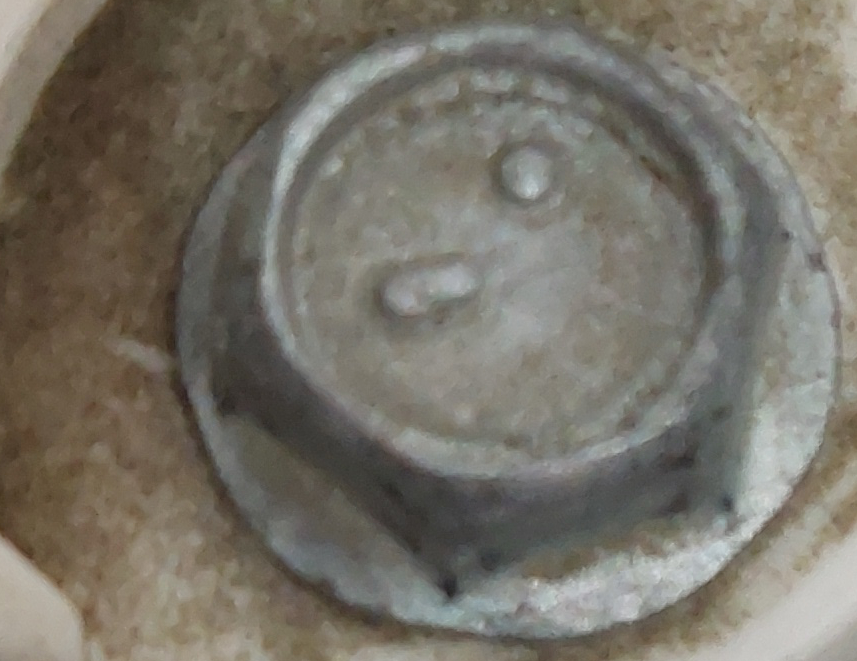

In [ ]:
from PIL import Image
for ind in df.index:
    print(df['x1'][ind], df['y1'][ind],df['x2'][ind], df['y2'][ind])
    img = Image.open(os.path.join(path, filename))

    img2 = img.crop((df['x1'][ind], df['y1'][ind],df['x2'][ind], df['y2'][ind]))
    img2.save(os.path.join(path,"img2.jpg"))
    #plt.imshow(new_image.astype(np.uint8))
    display(img2)

In [ ]:
print(df)

           x1          y1         x2           y2  confidence  class
0  103.110184  1237.26709  959.79657  1898.076782    0.286766    0.0


In [ ]:
model_2 = YOLO("yolov8m.yaml")  # build a new model from scratch
model_2 = YOLO("/content/drive/MyDrive/BoltRecognize-v1/Seg_v8_0904.pt")  # load a pretrained model (recommended for training)


                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics.nn.modules.conv.Conv             [384


0: 128x160 1 t1_seg, 1 t2_seg, 114.2ms
Speed: 3.9ms preprocess, 114.2ms inference, 2.9ms postprocess per image at shape (1, 3, 128, 160)
Results saved to runs/segment/predict3

0: 128x160 1 t1_seg, 1 t2_seg, 111.2ms
Speed: 0.9ms preprocess, 111.2ms inference, 2.5ms postprocess per image at shape (1, 3, 128, 160)
Results saved to runs/segment/predict3


(tensor([0]),)
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
(tensor([0]),)
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


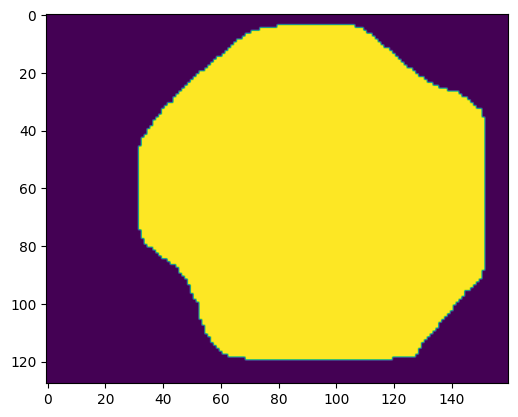

In [ ]:
##### Img2

for ind in df_2.index:
    results_2 = model_2.predict(source=img2, conf=0.2, save=True)
    boxes_2=[]
    #print(results_2)
    for result_2 in results_2:
      #print(result_2)
      masks = result_2.masks.data
      #print(masks)
      boxes_2 = result_2.boxes.data


      clss = boxes[:, 5]
      #print(clss)
      people_indices = torch.where(clss == 0.0)
      print(people_indices)
      # use these indices to extract the relevant masks
      people_masks = masks[people_indices]
      print(people_masks)
      # scale for visualizing results
      people_mask = torch.any(people_masks, dim=0).int() * 255
      #print(people_mask)
plt.imshow(people_mask.cpu().numpy())
plt.show()

0
103.11018371582031 1237.26708984375 959.7965698242188 1898.0767822265625



0: 128x160 1 t1_seg, 1 t2_seg, 76.1ms
Speed: 1.0ms preprocess, 76.1ms inference, 2.8ms postprocess per image at shape (1, 3, 128, 160)
Results saved to runs/segment/predict3


168.25209045410156 2.8456714153289795 808.1163940429688 622.1756591796875


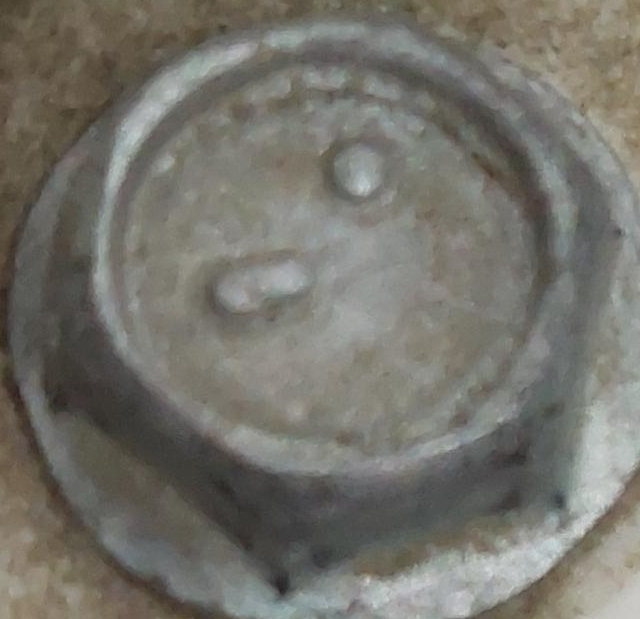

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
img = Image.open(os.path.join(path, filename))
df_2 = pd.DataFrame(columns=['x1','y1','x2','y2','confidence','class'])
for ind in df.index:
    print(ind)
    print(df['x1'][ind], df['y1'][ind],df['x2'][ind], df['y2'][ind])
    img2 = img.crop((df['x1'][ind], df['y1'][ind],df['x2'][ind], df['y2'][ind]))
    # Load a model
    img2
    results_2 = model_2.predict(source=img2, conf=0.2, save=True)
    boxes_2=[]
    #print(results_2)
    for result_2 in results_2:
      boxes_2 = result_2.boxes.data
      for i in boxes_2:
          #print(i)
          test = i.tolist()
          df_2.loc[len(df_2)] = [test[0],test[1],test[2],test[3],test[4],test[5]]
df_2.shape
df_2.head()

for ind in df.index:
    print(df_2['x1'][ind], df_2['y1'][ind],df_2['x2'][ind], df_2['y2'][ind])
    img2 = Image.open(os.path.join(path, 'img2.jpg'))

    img3 = img2.crop((df_2['x1'][ind], df_2['y1'][ind],df_2['x2'][ind], df_2['y2'][ind]))
    img3.save(os.path.join(path,"img3.jpg"))
    #plt.imshow(new_image.astype(np.uint8))
    display(img3)


0: 160x160 2 t1_segs, 156.8ms
Speed: 0.8ms preprocess, 156.8ms inference, 2.5ms postprocess per image at shape (1, 3, 160, 160)
Results saved to runs/segment/predict3

0: 160x160 2 t1_segs, 129.7ms
Speed: 0.8ms preprocess, 129.7ms inference, 5.6ms postprocess per image at shape (1, 3, 160, 160)
Results saved to runs/segment/predict3


(tensor([0]),)
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
(tensor([0]),)
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


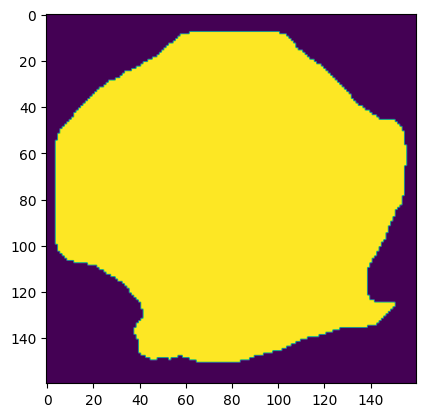

In [ ]:
##### Img3

for ind in df_2.index:
    results_2 = model_2.predict(source=img3, conf=0.2, save=True)
    boxes_2=[]
    #print(results_2)
    for result_2 in results_2:
      #print(result_2)
      masks = result_2.masks.data
      #print(masks)
      boxes_2 = result_2.boxes.data


      clss = boxes[:, 5]
      #print(clss)
      people_indices = torch.where(clss == 0.0)
      print(people_indices)
      # use these indices to extract the relevant masks
      people_masks = masks[people_indices]
      print(people_masks)
      # scale for visualizing results
      people_mask = torch.any(people_masks, dim=0).int() * 255
      #print(people_mask)
plt.imshow(people_mask.cpu().numpy())
plt.show()

In [ ]:
### SEGMENTATION --- https://dev.to/andreygermanov/how-to-implement-instance-segmentation-using-yolov8-neural-network-3if9

def get_mask(row,box):
    mask = row.reshape(160,160)
    mask = sigmoid(mask)
    mask = (mask > 0.5).astype('uint8')*255
    x1,y1,x2,y2 = box
    mask_x1 = round(x1/img_width*160)
    mask_y1 = round(y1/img_height*160)
    mask_x2 = round(x2/img_width*160)
    mask_y2 = round(y2/img_height*160)
    mask = mask[mask_y1:mask_y2,mask_x1:mask_x2]
    img_mask = Image.fromarray(mask,"L")
    img_mask = img_mask.resize((round(x2-x1),round(y2-y1)))
    mask = np.array(img_mask)
    return mask

def get_polygon(mask):
    contours = cv2.findContours(mask,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
    polygon = [[contour[0][0],contour[0][1]] for contour in contours[0][0]]
    return polygon

objects = []
for row in boxes:
    prob = row[4:84].max()
    if prob < 0.5:
        continue
    xc,yc,w,h = row[:4]
    class_id = row[4:84].argmax()
    x1 = (xc-w/2)/640*img_width
    y1 = (yc-h/2)/640*img_height
    x2 = (xc+w/2)/640*img_width
    y2 = (yc+h/2)/640*img_height
    label = yolo_classes[class_id]
    mask = get_mask(row[84:25684],(x1,y1,x2,y2))
    polygon = get_polygon(mask)
    objects.append([x1,y1,x2,y2,label,prob,mask,polygon])

objects.sort(key=lambda x: x[5], reverse=True)
result = []
while len(objects)>0:
    result.append(objects[0])
    objects = [object for object in objects if iou(object,objects[0])<0.7]


image 1/1 /content/drive/MyDrive/BoltRecognize-v1/test/img2.jpg: 128x160 1 t1_seg, 1 t2_seg, 519.5ms
Speed: 7.1ms preprocess, 519.5ms inference, 2.7ms postprocess per image at shape (1, 3, 128, 160)


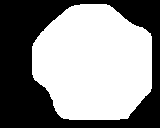

In [ ]:
from ultralytics import YOLO
results_2 = model_2.predict(os.path.join(path, "img2.jpg"))
result_2 = results_2[0]
#print(result)
masks_2 = result_2.masks
#print(masks)
len(masks_2)
mask1_2 = masks_2[0]

mask_2 = mask1_2.data[0].numpy()
polygon = mask1_2.xy[0]

from PIL import Image
mask_img = Image.fromarray(mask_2,"I")
mask_img

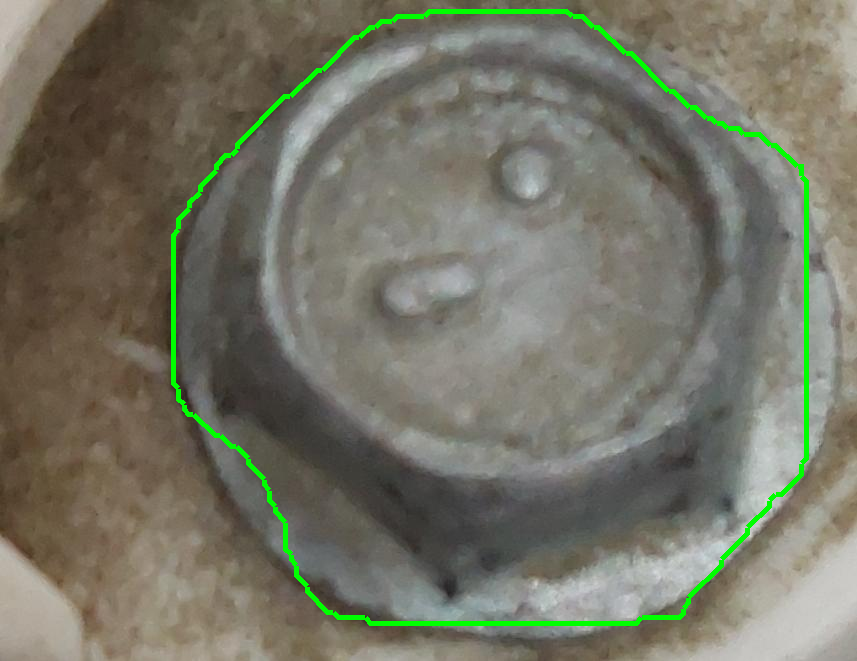

In [ ]:
from PIL import ImageDraw

img = Image.open(os.path.join(path, "img2.jpg"))
draw = ImageDraw.Draw(img)
draw.polygon(polygon,outline=(0,255,0), width=5)
img


In [ ]:
polygon

array([[      428.5,       9.125],
       [     423.14,      14.481],
       [     396.36,      14.481],
       [     391.01,      19.837],
       [     380.29,      19.837],
       [     374.94,      25.194],
       [     369.58,      25.194],
       [     358.87,      35.906],
       [     353.51,      35.906],
       [     321.38,      68.044],
       [     316.02,      68.044],
       [     289.24,      94.825],
       [     283.88,      94.825],
       [     235.68,      143.03],
       [     235.68,      148.39],
       [     230.32,      153.74],
       [     224.96,      153.74],
       [     214.25,      164.46],
       [     214.25,      169.81],
       [     198.18,      185.88],
       [     198.18,      191.24],
       [     187.47,      201.95],
       [     187.47,      207.31],
       [     176.76,      218.02],
       [     176.76,      228.73],
       [      171.4,      234.09],
       [      171.4,      384.06],
       [     176.76,      389.42],
       [     176.76,